In [2]:
#This is a Python program to simulate a 1-D random walk in two ways and demonstrate entropy

In [28]:
#imports
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit
import statistics

Entropy is: 1.8780916391015998


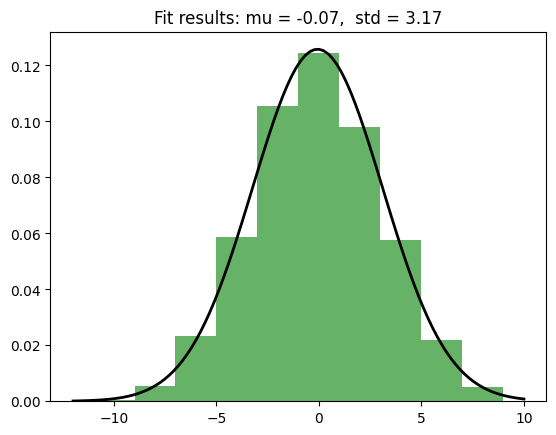

In [33]:
#Standard 1-D random walk 
#establish tracking system for final position and steps in each direction
distribution=[]
rstep=0
lstep=0
n=10000
for a in range(n):     #loop through the 10-step walk 100000 times
  #start at 0
  x=0
  for n in range(0,10):
     z = random.randint(1,2)
     if z==1:
      x=x+1           #half the time, move to the right
      rstep=rstep+1   #track number of right steps
     else:
      x=x-1           #half the time, move to the left
      lstep=lstep+1   #track number of left steps
  distribution.append(x)     #keep track of where the walk ends

#plot the different ending spots of the walk with a fit
mu, std = norm.fit(distribution)  
fig,ax = plt.subplots()
plt.hist(distribution, bins=range(-10,11,2), density=True, alpha=0.6, color='g', align='left')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = 'Fit results: mu = %.2f,  std = %.2f' % (mu, std)
plt.title(title)

#find the entropy using the equation S = -Σp(x)ln(p(x) where S is the entropy
    #and p(x) is the probabilities
def calc_entropy(dist):
    hist, _ = np.histogram(dist, bins=30, density=True)
    probabilities = hist / np.sum(hist)
    entropy = -np.sum(probabilities * np.log(probabilities + 1e-10))  # Adding a small value to avoid log(0)
    return entropy
entropy=calc_entropy(distribution)
print("Entropy is:", entropy)

NameError: name 'pyplot' is not defined

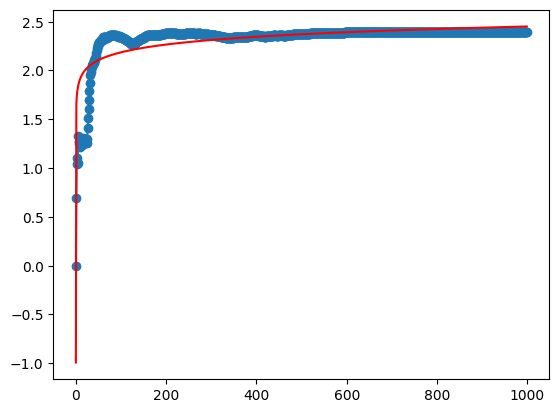

In [39]:
#1-D walker in a box, with entropy as a function of number of steps
entropy_values=[]
distribution=[]
steps=1000
box=10
x=0
for a in range(steps):
    z= random.randint(1,2)
    if x == box:       #address what happens at the rightmost edge
        if z==1:
          x=x
        else:
          x=x-1
    elif x == 0:       #address what happens at the leftmost edge
          if z==1:
              x=x
          else:
              x=x+1
    else:              #not at an edge
        if z==1:
          x=x+1        #move to the right
        else:
          x=x-1        #move to the left
    distribution.append(x)               #add result to list of positions
    entropy=calc_entropy(distribution)   #calculate the entropy of that list of positions
    entropy_values.append(entropy)       #add to a list of values
#fit and plot the data
def model_func(x, a, b):
    return a * np.log(x+1e-10) + b
def fit_model(x, y):
    popt, _ = curve_fit(model_func, x, y)
    return popt
steps_array = np.array(range(steps))
fit_params = fit_model(steps_array, entropy_values)
plt.plot(range(steps), entropy_values, marker='o')
plt.plot(steps_array, model_func(steps_array, *fit_params), 'r-', label='Fit: a*log(x) + b')
pyplot.ylim(ymin=0)
plt.xlabel('Number of Steps')
plt.ylabel('Entropy')
plt.title('Entropy as a Function of Number of Steps')
plt.legend()
plt.show()